# Import dos Df e Afins

In [57]:
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
import numpy as np

df_Treino = pd.read_csv("cleanTraining.csv")
df_Teste = pd.read_csv("cleanTest.csv")

# Criação das colunas positivas e negativas para fazer a validação da evasão
colunas_positivas = [
    'nr_atividades_mapeadas',
    'nr_questionarios_finalizados',
    'nr_dias_uso',
    'vl_medio_atividade_diaria',
    'nr_interacoes_usuario',
    'nr_submissoes_codigo'
]

colunas_negativas = [
    'nr_dias_desde_ultimo_acesso',
    'abandono'
]

# Remove um ' ' que tem antes do nome de cada coluna, isso causava que o algoritmo se perdesse na seleção das colunas
df_Treino.columns = df_Treino.columns.str.strip()
df_Teste.columns = df_Teste.columns.str.strip()

# O 'MinMaxScaler()' cria uma escala baseada nos dados de entrada que recebe, normalmente entre 0 e 1.
# Ex: 
# [100, 200, 300, 400, 500]
# MinMaxScaler().fit_transform(...)
# [0.0, 0.25, 0.5, 0.75, 1.0]
scaler = MinMaxScaler()

# Cria 2 váriaveis com a escala feita pelo 'scaler', lembrando que o calculo que ele faz é feito individualmente coluna a coluna
engajamento_positivo = scaler.fit_transform(df_Treino[colunas_positivas])
engajamento_negativo = scaler.fit_transform(df_Treino[colunas_negativas])

# Calcula a média das 2 variáveis e subtrai elas entre si
indice_engajamento = (
    engajamento_positivo.mean(axis=1) - engajamento_negativo.mean(axis=1)
)

# Usa o MinMaxScaler novamente só que com o range de 1 a 10 em vez do padrão 0 a 1, depois usa o fit_transform na variável de indice das médias porem reestruturando ela em uma coluna.
# Por fim o '.round()' apenas arredonda o número que saiu do fit para o inteiro mais próximo com base na escala feita.
df_Treino["indice_evasao"] = MinMaxScaler(feature_range=(1, 10)).fit_transform(indice_engajamento.reshape(-1, 1)).round()

df_Treino

,nr_dias_desde_primeiro_acesso,nr_dias_desde_ultimo_acesso,nr_atividades_sinalizadas,nr_atividades_mapeadas,nr_discussoes_forum_postadas,nr_questionarios_abandonados,nr_questionarios_finalizados,nr_intervalos_uso,nr_dias_uso,vl_medio_atividade_diaria,...,nr_engajamento_questionario,nr_questoes_respondidas,nr_questoes_corretas,nr_questoes_erradas,nr_questoes_parciais,nr_itens_avaliados,nr_itens_nao_respondidos,nr_submissoes_codigo,abandono,indice_evasao
0,20,6,0,4,0,0,1,14.0,3,4.7333,...,34,44,1,0,0,1,62,0,0,6.0
1,19,18,0,0,0,0,0,1.0,2,9.5000,...,3,0,0,0,0,0,0,0,0,6.0
2,34,34,0,0,0,0,1,0.0,1,36.0000,...,24,44,1,0,0,1,62,0,0,6.0
3,20,5,0,0,0,0,2,15.0,7,11.7500,...,43,58,40,16,0,5,58,0,0,6.0
4,20,20,0,0,0,0,0,0.0,1,7.0000,...,0,0,0,0,0,0,0,0,0,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,220,12,0,12,0,0,0,208.0,3,0.1866,...,0,0,0,0,0,0,90,0,0,6.0
86,12,1,0,0,0,0,2,11.0,2,5.3333,...,48,59,39,18,0,1,62,0,0,6.0
87,4,0,0,0,0,0,4,4.0,4,70.6000,...,115,64,55,5,1,21,42,6,0,7.0
88,305,305,0,0,0,0,1,273.0,4,0.4051,...,86,37,14,10,0,2,43,0,1,1.0


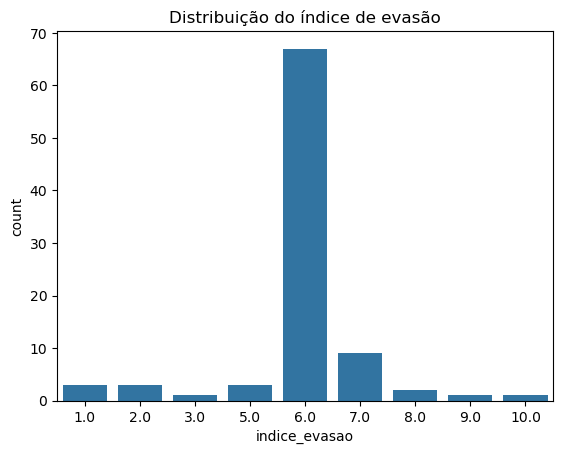

In [58]:
import seaborn as sns
import matplotlib.pyplot as plt

# Gráfico de barra do índice de evasão numérico
sns.countplot(data=df_Treino, x='indice_evasao')
plt.title('Distribuição do índice de evasão')
plt.show()


In [59]:
def agrupar_evasao(n):
    if n <= 3:
        return 'alta'
    elif n <= 7:
        return 'média'
    else:
        return 'baixa'

# Cria uma nova coluna com base no indice_evasão, mas utilizando a def de agrupar_evasao. Isso cria uma coluna com a diferença de alta/media/baixa com base no numero do indice
df_Treino['evasao_cat'] = df_Treino['indice_evasao'].apply(agrupar_evasao)

df_Treino.to_csv('cleanPredictTraining.csv', index=False)


In [60]:
# Define que X (features usadas para a predição) é o df_Treino porem sem as colunas de indice, evasao e abandono
X = df_Treino.drop(columns=['indice_evasao', 'evasao_cat', 'abandono'])
# Define que o Y (variável que vai ser prevista) se chama indice_evasao
y = df_Treino['indice_evasao']

In [61]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Separação dos dados
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Modelo de regressão
clf = RandomForestRegressor(random_state=42)
clf.fit(X_train, y_train)

# Predição
y_pred = clf.predict(X_val)

# Avaliação
print("MAE:", mean_absolute_error(y_val, y_pred))
print("MSE:", mean_squared_error(y_val, y_pred,))
print("R²:", r2_score(y_val, y_pred))



MAE: 0.27611111111111103
MSE: 0.31170555555555546
R²: 0.8589488826815643


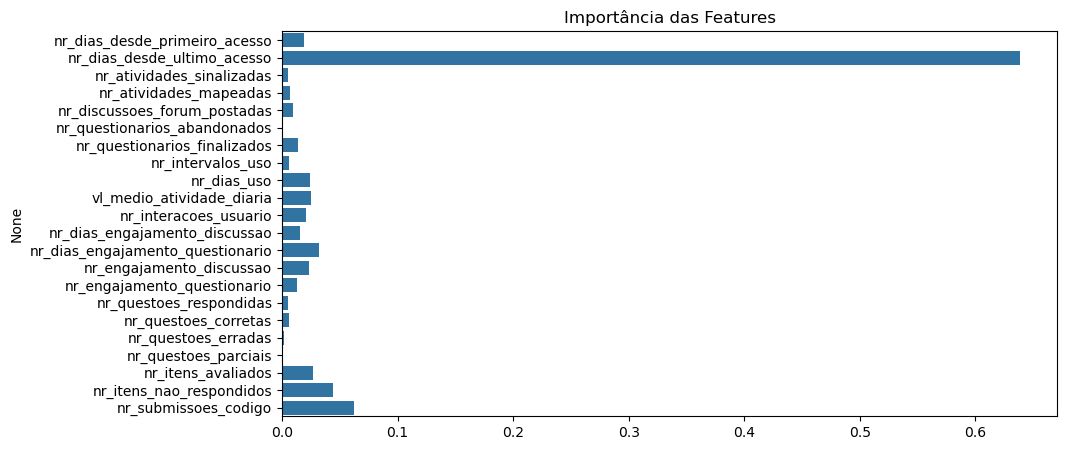

In [62]:
importances = clf.feature_importances_
feat_names = X.columns

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
sns.barplot(x=importances, y=feat_names)
plt.title("Importância das Features")
plt.show()


In [63]:
print(df_Treino['indice_evasao'].value_counts())

indice_evasao
6.0     67
7.0      9
2.0      3
5.0      3
1.0      3
8.0      2
3.0      1
9.0      1
10.0     1
Name: count, dtype: int64


In [64]:
# Msm tratamento feito com o df de teste
df_Teste.columns = df_Teste.columns.str.strip()

engajamento_positivo = scaler.fit_transform(df_Teste[colunas_positivas])
engajamento_negativo = scaler.fit_transform(df_Teste[colunas_negativas])

indice_engajamento = engajamento_positivo.mean(axis=1) - engajamento_negativo.mean(axis=1)
df_Teste["indice_evasao"] = MinMaxScaler(feature_range=(1, 10)).fit_transform(indice_engajamento.reshape(-1, 1)).round()

df_Teste["evasao_cat"] = df_Teste["indice_evasao"].apply(agrupar_evasao)

X_Teste = df_Teste[X.columns]  # Usa as mesmas colunas do treino


In [65]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Prever os valores de índice de evasão
y_test = df_Teste['indice_evasao']
y_pred = clf.predict(X_Teste)

# Avaliar o modelo com métricas de regressão
print("MAE:", mean_absolute_error(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print("R²:", r2_score(y_test, y_pred))



MAE: 0.48777777777777764
MSE: 0.7398833333333333
R²: 0.7594961625282167


# Dispersão Dos Valores Reais Vs. Previstos

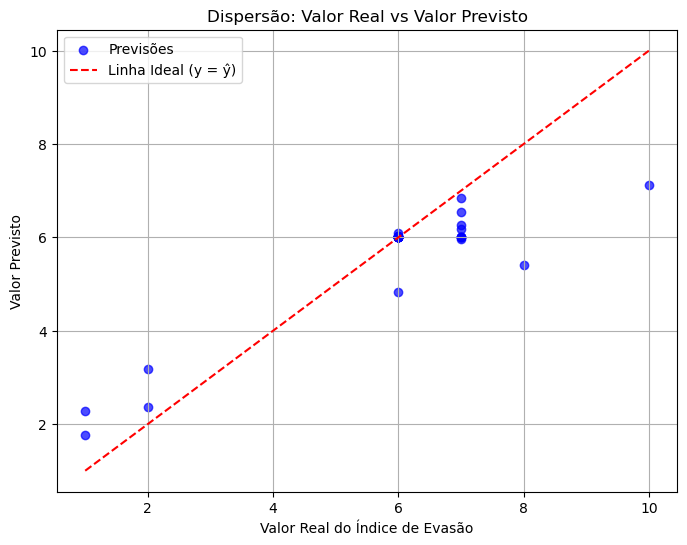

In [66]:
import matplotlib.pyplot as plt

# Gráfico de dispersão: valores reais vs previstos
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.7, color='blue', label='Previsões')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', label='Linha Ideal (y = ŷ)')

plt.xlabel('Valor Real do Índice de Evasão')
plt.ylabel('Valor Previsto')
plt.title('Dispersão: Valor Real vs Valor Previsto')
plt.legend()
plt.grid(True)
plt.show()


# Gráfico de Erros Residuais (Valor Real vs Erro de Previsão)

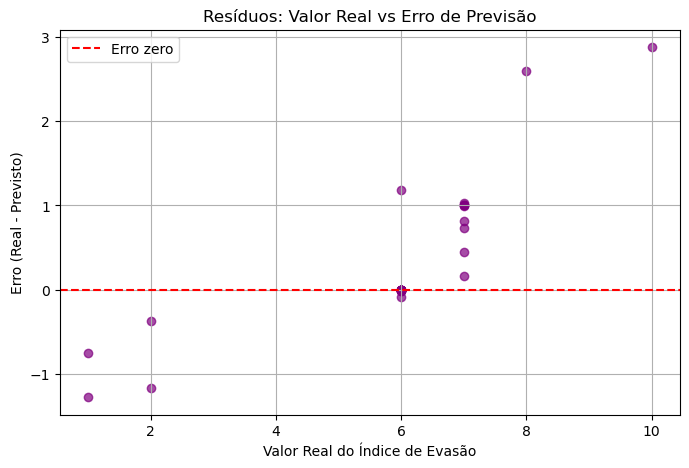

In [67]:
import matplotlib.pyplot as plt

# Calcula os resíduos
residuos = y_test - y_pred

# Gráfico de dispersão: Valor Real vs Erro
plt.figure(figsize=(8, 5))
plt.scatter(y_test, residuos, alpha=0.7, color='purple')
plt.axhline(0, color='red', linestyle='--', label='Erro zero')
plt.xlabel('Valor Real do Índice de Evasão')
plt.ylabel('Erro (Real - Previsto)')
plt.title('Resíduos: Valor Real vs Erro de Previsão')
plt.grid(True)
plt.legend()
plt.show()


# Histograma dos Erros de Previsão

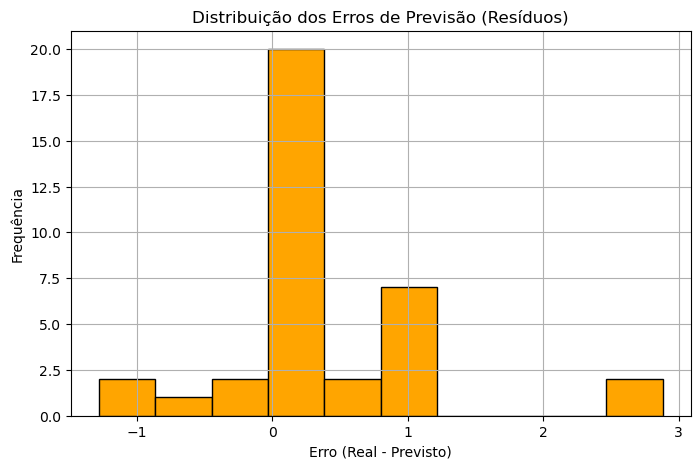

In [68]:
# Histograma dos erros
plt.figure(figsize=(8, 5))
plt.hist(residuos, bins=10, color='orange', edgecolor='black')
plt.title('Distribuição dos Erros de Previsão (Resíduos)')
plt.xlabel('Erro (Real - Previsto)')
plt.ylabel('Frequência')
plt.grid(True)
plt.show()
